In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open("/Users/sasha/Documents/makemore/data/names.txt", "r").read().splitlines()

In [3]:
N = torch.zeros((27, 27), dtype=torch.int32)
chars = sorted(list(set("".join(words))))
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi["."] = 0
itos = {i: s for s, i in stoi.items()}
for word in words:
    _word = ["."] + list(word) + ["."]
    for char1, char2 in zip(_word, _word[1:]):
        ix1 = stoi[char1]
        ix2 = stoi[char2]
        N[ix1][ix2] += 1
P = (N + 1).float()
P = P / P.sum(1, keepdim=True)

In [4]:
xs, ys = [], []
for word in words[:1]:
    _word = ["."] + list(word) + ["."]
    for char1, char2 in zip(_word, _word[1:]):
        ix1 = stoi[char1]
        ix2 = stoi[char2]
        xs.append(ix1)
        ys.append(ix2) 

In [5]:
xs = torch.tensor(xs)
xs

tensor([ 0,  5, 13, 13,  1])

In [6]:
ys = torch.tensor(ys)
ys

tensor([ 5, 13, 13,  1,  0])

In [7]:
xenc = F.one_hot(xs, num_classes=27)
xenc

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]])

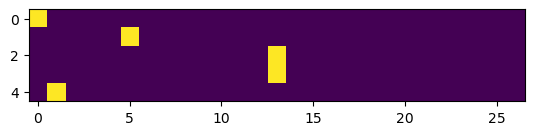

In [8]:
plt.imshow(xenc)
plt.show()

In [9]:
xenc.dtype

torch.int64

In [10]:
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [11]:
W = torch.randn((27, 1))
W

tensor([[ 0.3256],
        [-1.8665],
        [ 1.2828],
        [-0.3878],
        [ 0.5880],
        [-0.2579],
        [ 0.1261],
        [-0.6934],
        [-0.2477],
        [ 1.9652],
        [-0.0190],
        [ 0.3016],
        [-0.0629],
        [-0.5260],
        [-0.1687],
        [-1.1202],
        [ 0.6633],
        [-1.8051],
        [-2.8029],
        [ 1.6494],
        [-0.8520],
        [ 0.7722],
        [ 0.7971],
        [-0.7944],
        [ 1.2585],
        [-0.4241],
        [-0.8965]])

In [12]:
xenc @ W

tensor([[ 0.3256],
        [-0.2579],
        [-0.5260],
        [-0.5260],
        [-1.8665]])

In [13]:
W = torch.randn((27, 27))
W

tensor([[ 2.0997, -0.5851, -1.2660, -2.0643, -1.0813,  0.4242, -0.4558,  0.1328,
         -1.1665,  1.4631,  0.7511, -1.7821, -0.1518,  0.2672,  0.1278, -0.6125,
         -0.6685,  0.7781, -0.8549, -0.5373, -0.4775,  0.3356, -0.7235, -1.9875,
         -1.4958,  0.5518, -2.6549],
        [ 1.3622, -0.0401,  0.7009,  0.2751,  0.5574, -0.0089, -1.6495,  1.1839,
          0.3189, -0.8573, -0.4323,  1.5412, -0.2874,  0.5179,  0.2696, -1.0811,
          1.3513,  1.5121,  0.4197, -0.4161,  0.5721, -0.0037,  0.6953, -0.0215,
          0.6543,  0.4810,  1.0115],
        [ 1.5814, -0.7751,  0.1678,  0.5214, -0.8418,  1.8163, -0.7407,  0.9884,
          0.3190, -0.0243,  0.6980, -0.7481, -0.1580, -0.2871,  0.2105, -0.9602,
         -0.8368,  0.4415, -1.2805,  1.3858, -0.7721,  0.6873, -0.8676,  0.2408,
          1.1356,  1.0593,  0.3853],
        [ 0.1036, -0.7787, -0.1483, -0.9602, -1.9907, -1.4454, -1.4766,  0.7601,
         -1.2568, -0.0048, -0.1467,  1.3002, -0.8024, -1.6096, -0.4148, -0.6406

In [14]:
xenc @ W

tensor([[ 2.0997, -0.5851, -1.2660, -2.0643, -1.0813,  0.4242, -0.4558,  0.1328,
         -1.1665,  1.4631,  0.7511, -1.7821, -0.1518,  0.2672,  0.1278, -0.6125,
         -0.6685,  0.7781, -0.8549, -0.5373, -0.4775,  0.3356, -0.7235, -1.9875,
         -1.4958,  0.5518, -2.6549],
        [-2.1128, -0.8594,  0.7128, -0.4850, -0.5981, -1.2160, -1.0083,  0.5635,
         -0.7166, -0.4411, -0.0416,  2.2022, -0.2648,  1.0286,  0.4730, -0.7571,
         -0.2058,  1.4571,  0.4746,  0.8637, -0.3836, -2.0917,  0.1641,  0.8879,
          0.5348,  0.3236, -2.6908],
        [ 0.4831,  0.1677,  0.2289,  0.0054,  0.3321,  0.4677,  0.6303, -0.7557,
         -0.3791, -0.9196,  1.6644, -0.3022, -1.4478, -0.3948,  0.8800, -1.2717,
          0.2960, -2.2828,  1.4398, -0.6779,  0.2397,  0.5098,  0.7003,  0.2180,
          0.1838, -0.0930, -0.7214],
        [ 0.4831,  0.1677,  0.2289,  0.0054,  0.3321,  0.4677,  0.6303, -0.7557,
         -0.3791, -0.9196,  1.6644, -0.3022, -1.4478, -0.3948,  0.8800, -1.2717

In [15]:
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)

In [16]:
probs[0].sum()

tensor(1.0000)

In [17]:
probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]

(tensor(0.0479),
 tensor(0.0706),
 tensor(0.0187),
 tensor(0.0328),
 tensor(0.0810))

In [18]:
loss = -probs[torch.arange(5), ys].log().mean()
loss

tensor(3.1201)

In [19]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [20]:
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(5), ys].log().mean()

In [21]:
loss.item()

3.7693049907684326

In [22]:
W.grad = None
loss.backward()

In [23]:
W

tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9644e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01,
         -4.7125e-01,  7.8682e-01, -3.2844e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4040e-01,
          9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0731e-02,
          2.4968e+00,  2.4448e+00],
        [-6.7006e-01, -1.2199e+00,  3.0314e-01, -1.0725e+00,  7.2762e-01,
          5.1114e-02,  1.3095e+00, -8.0220e-01, -8.5042e-01, -1.8068e+00,
          1.2523e+00, -1.2256e+00,  1.2165e+00, -9.6478e-01, -2.3211e-01,
         -3.4762e-01,  3.3244e-01, -1.3263e+00,  1.1224e+00,  5.9641e-01,
          4.5846e-01,  5.4011e-02, -1.7400e+00,  1.1560e-01,  8.0319e-01,
          5.4108e-01, -1.1646e+00],
        [ 1.4756e-01, -1.0006e+00,  3.8012e-01,  4.7328e-01, -9.1027e-01,
         -7.8305e-01,  1.3506e-01, -2.1161e-01, -1.0406e+00, -1.5367e+00,
          9.3743e-01, -8.8303e-01,  1.74

In [24]:
W.grad

tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1970,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0198,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [25]:
W.data += -0.1 * W.grad 

In [26]:
W.data

tensor([[ 1.5661e+00, -2.3749e-01, -2.7631e-02, -1.1009e+00,  2.8554e-01,
         -9.8893e-03, -1.5471e+00,  6.0443e-01,  7.8862e-02,  9.0400e-01,
         -4.7141e-01,  7.8627e-01, -3.2862e-01, -4.3313e-01,  1.3719e+00,
          2.9286e+00,  1.5606e+00, -1.6261e+00,  6.7666e-01, -8.4050e-01,
          9.8420e-01, -1.4859e-01, -1.4796e+00,  4.4790e-01, -7.0966e-02,
          2.4937e+00,  2.4419e+00],
        [-6.5036e-01, -1.2201e+00,  3.0235e-01, -1.0727e+00,  7.2641e-01,
          5.0498e-02,  1.3073e+00, -8.0246e-01, -8.5067e-01, -1.8069e+00,
          1.2503e+00, -1.2258e+00,  1.2145e+00, -9.6500e-01, -2.3257e-01,
         -3.4803e-01,  3.3163e-01, -1.3264e+00,  1.1206e+00,  5.9535e-01,
          4.5753e-01,  5.3393e-02, -1.7401e+00,  1.1494e-01,  8.0189e-01,
          5.4007e-01, -1.1648e+00],
        [ 1.4756e-01, -1.0006e+00,  3.8012e-01,  4.7328e-01, -9.1027e-01,
         -7.8305e-01,  1.3506e-01, -2.1161e-01, -1.0406e+00, -1.5367e+00,
          9.3743e-01, -8.8303e-01,  1.74

In [27]:
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(5), ys].log().mean()
loss.item()

3.7492129802703857

In [28]:
alpha = 0.1
epochs = 100
for i in range(epochs):
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)
    loss = -probs[torch.arange(len(xs)), ys].log().mean()
    W.grad = None
    loss.backward()
    W.data += -alpha * W.grad
    print(f"epoch {i+1}: loss = {loss.item():.4f}")

epoch 1: loss = 3.7492
epoch 2: loss = 3.7292
epoch 3: loss = 3.7092
epoch 4: loss = 3.6892
epoch 5: loss = 3.6693
epoch 6: loss = 3.6494
epoch 7: loss = 3.6296
epoch 8: loss = 3.6098
epoch 9: loss = 3.5900
epoch 10: loss = 3.5703
epoch 11: loss = 3.5507
epoch 12: loss = 3.5311
epoch 13: loss = 3.5115
epoch 14: loss = 3.4920
epoch 15: loss = 3.4725
epoch 16: loss = 3.4531
epoch 17: loss = 3.4337
epoch 18: loss = 3.4144
epoch 19: loss = 3.3951
epoch 20: loss = 3.3759
epoch 21: loss = 3.3567
epoch 22: loss = 3.3376
epoch 23: loss = 3.3185
epoch 24: loss = 3.2995
epoch 25: loss = 3.2806
epoch 26: loss = 3.2616
epoch 27: loss = 3.2428
epoch 28: loss = 3.2240
epoch 29: loss = 3.2052
epoch 30: loss = 3.1865
epoch 31: loss = 3.1679
epoch 32: loss = 3.1493
epoch 33: loss = 3.1308
epoch 34: loss = 3.1123
epoch 35: loss = 3.0939
epoch 36: loss = 3.0755
epoch 37: loss = 3.0572
epoch 38: loss = 3.0389
epoch 39: loss = 3.0207
epoch 40: loss = 3.0026
epoch 41: loss = 2.9845
epoch 42: loss = 2.9665
e

In [29]:
xs, ys = [], []
for word in words:
    chs = ["."] + list(word) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        xs.append(stoi[ch1])
        ys.append(stoi[ch2])
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [30]:
xenc = F.one_hot(xs, num_classes=27).float()

In [31]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [32]:
alpha = 5
epochs = 100
for i in range(epochs):
    logits = xenc @ W                      
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)
    loss = -probs[torch.arange(len(xs)), ys].log().mean()
    W.grad = None
    loss.backward()
    W.data += -alpha * W.grad
    print(f"epoch {i+1}: loss = {loss.item():.4f}")

epoch 1: loss = 3.7590
epoch 2: loss = 3.7139
epoch 3: loss = 3.6714
epoch 4: loss = 3.6312
epoch 5: loss = 3.5931
epoch 6: loss = 3.5568
epoch 7: loss = 3.5224
epoch 8: loss = 3.4897
epoch 9: loss = 3.4585
epoch 10: loss = 3.4289
epoch 11: loss = 3.4007
epoch 12: loss = 3.3738
epoch 13: loss = 3.3483
epoch 14: loss = 3.3239
epoch 15: loss = 3.3008
epoch 16: loss = 3.2787
epoch 17: loss = 3.2577
epoch 18: loss = 3.2376
epoch 19: loss = 3.2185
epoch 20: loss = 3.2003
epoch 21: loss = 3.1828
epoch 22: loss = 3.1661
epoch 23: loss = 3.1502
epoch 24: loss = 3.1349
epoch 25: loss = 3.1202
epoch 26: loss = 3.1061
epoch 27: loss = 3.0926
epoch 28: loss = 3.0796
epoch 29: loss = 3.0671
epoch 30: loss = 3.0551
epoch 31: loss = 3.0434
epoch 32: loss = 3.0322
epoch 33: loss = 3.0214
epoch 34: loss = 3.0110
epoch 35: loss = 3.0009
epoch 36: loss = 2.9911
epoch 37: loss = 2.9817
epoch 38: loss = 2.9726
epoch 39: loss = 2.9637
epoch 40: loss = 2.9552
epoch 41: loss = 2.9469
epoch 42: loss = 2.9388
e

In [33]:
g = torch.Generator().manual_seed(2147483647)
for i in range(10): 
    ix = 0 
    out = []
    while True:
        x = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = x @ W
        probs = logits.softmax(dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))

dexzmalegllusailezktxha.
kllimittain.
lgdan.
ka.
da.
st.
zvpucjalhrigmtok.
mbliellavugkwpteda.
ka.
eria.
